<a href="https://colab.research.google.com/github/AWTT237/ASSIGNMENT2/blob/main/assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Task 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder


In [87]:
# Task2 Mount Google Drive and Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# Replace with your file path in Google Drive
file_path = '/content/drive/MyDrive/amazon_alexa.csv'
df = pd.read_csv(file_path)

# Preview data
df.head()

,rating,date,variation,verified_reviews,feedback,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,31-Jul-18,Walnut Finish,Sometimes while playing a game,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,31-Jul-18,Charcoal Fabric,Music,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


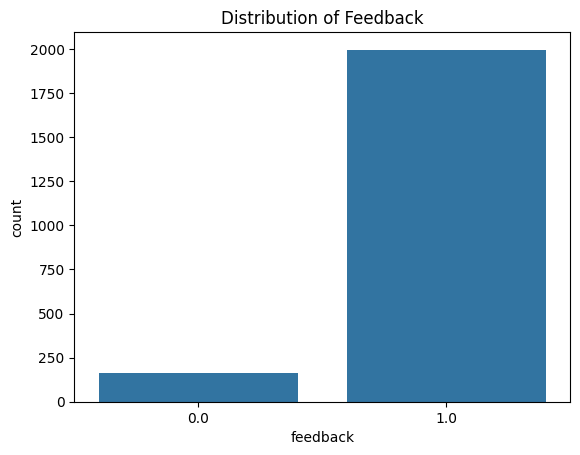

In [90]:
# Task 3: Data Visualization
# Distribution of feedback
sns.countplot(x='feedback', data=df)
plt.title('Distribution of Feedback')
plt.show()



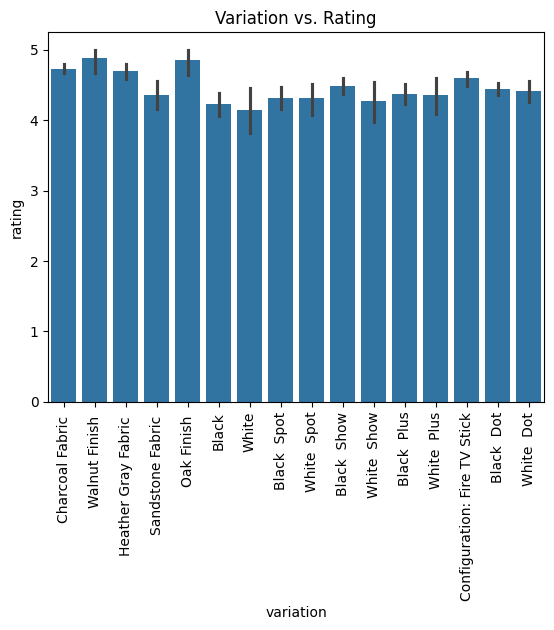

In [91]:
# Visualize the relationship between variations and ratings

sns.barplot(x='variation', y='rating', data=df)
plt.title('Variation vs. Rating')
plt.xticks(rotation=90)
plt.show()

In [92]:
#  Drop Irrelevant Columns

df = df.drop(['date', 'rating'], axis=1)


In [93]:
# Task 5: One-Hot Encode 'variation'

variation_encoded = pd.get_dummies(df['variation'], prefix='variation')
df = pd.concat([df, variation_encoded], axis=1)
df = df.drop('variation', axis=1)

In [94]:
# Fill NaNs in reviews
df['verified_reviews'] = df['verified_reviews'].fillna('')

vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(df['verified_reviews'])

In [95]:

# Convert sparse matrix to DataFrame
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

In [96]:

# Drop original text column and combine
df = df.drop('verified_reviews', axis=1)
df_final = pd.concat([df.reset_index(drop=True), X_text_df.reset_index(drop=True)], axis=1)

In [97]:

# Task 7: Prepare Features and Target
X = df_final.drop('feedback', axis=1)
y = df_final['feedback']

# Encode target: positive = 1, negative = 0
y = y.map({'positive': 1, 'negative': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
# Task 8: Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: ' five and six. I was almost ready to send to back.The app is extremely slow and it took hours to get this thing set up. However depending on what you are going to be using it for I think it\'s an ok item."\t1'

In [100]:
# Task 9: Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [101]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


NameError: name 'y_pred' is not defined

In [102]:
# Accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f'Training Accuracy: {train_acc:.2f}')
print(f'Testing Accuracy: {test_acc:.2f}')


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [103]:
# Task 10: Feature Importance
# -----------------------------
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 20 Feature Importances')
plt.show()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [104]:
# Task 11: Predict Sentiment Function
def predict_sentiment(review_text):
    review_vect = vectorizer.transform([review_text])
    review_df = pd.DataFrame(review_vect.toarray(), columns=vectorizer.get_feature_names_out())
    # Add variation columns filled with 0
    for col in [c for c in df_final.columns if c.startswith('variation_')]:
        review_df[col] = 0
    review_df = review_df.reindex(columns=X_train.columns, fill_value=0)
    pred = model.predict(review_df)
    return 'positive' if pred[0]==1 else 'negative'

In [105]:
# Example usage
new_review = "I love my Alexa device! It's so helpful."
predicted_sentiment = predict_sentiment(new_review)
print(f"The sentiment of the new review is: {predicted_sentiment}")

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.